<a href="https://colab.research.google.com/github/Diljitsingh14/Colab-Notebooks/blob/main/Gemini_Pro_langchain_PDFQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv langchain pypdf cassio datasets tiktoken


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00


In [4]:
import google.generativeai as genai
from google.colab import userdata
from dotenv import load_dotenv
from IPython.display import display,Markdown,Image
import textwrap
import requests
import os

In [5]:
GOOGLE_API_KEY = userdata.get('GeminiProKey')
ASTRA_TOKEN =  userdata.get('astra-db-id')
ASTRA_DB_ID = userdata.get('astra-db')
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY
genai.configure(api_key=GOOGLE_API_KEY)

In [6]:
def to_markdown(text):
  text = text.replace('•',"*")
  return Markdown(textwrap.indent(text,'>', predicate= (lambda _: True) ))

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
test_response = model.generate_content("List 5 Best books for Brain Tracy")
to_markdown(test_response.text)

CPU times: user 79.1 ms, sys: 13.5 ms, total: 92.6 ms
Wall time: 11.4 s


>1. **Eat That Frog!: 21 Great Ways to Stop Procrastinating and Get More Done in Less Time**
>
>This book is all about overcoming procrastination and getting things done. Tracy argues that the key to success is to focus on the most important task first, and then to break it down into smaller, more manageable steps. He also provides a number of tips and techniques for overcoming procrastination, such as setting deadlines, creating a to-do list, and rewarding yourself for completing tasks.
>
>2. **The Psychology of Achievement: How to Set Goals, Overcome Obstacles, and Achieve Success**
>
>In this book, Tracy explores the psychology of achievement and provides a step-by-step guide to setting goals, overcoming obstacles, and achieving success. He argues that the key to success is to have a strong desire for success, to be willing to work hard, and to never give up on your dreams. He also provides a number of tips and techniques for overcoming obstacles, such as building self-confidence, developing a positive attitude, and managing stress.
>
>3. **Maximum Achievement: Strategies and Skills That Will Unleash Your Hidden Powers to Succeed**
>
>This book is a comprehensive guide to achieving success in all areas of life. Tracy covers a wide range of topics, including goal setting, time management, overcoming procrastination, and developing a positive attitude. He also provides a number of practical tips and techniques for achieving success, such as creating a vision board, setting SMART goals, and taking action.
>
>4. **The Power of Self-Confidence: Become Unstoppable, Achieve More, and Live a Better Life**
>
>In this book, Tracy explores the importance of self-confidence and provides a step-by-step guide to developing it. He argues that self-confidence is the key to success in all areas of life, and that it can be developed through a combination of positive thinking, self-affirmations, and taking action. He also provides a number of tips and techniques for overcoming self-doubt, building self-esteem, and developing a strong sense of self-worth.
>
>5. **The 12 Pillars of Success: The Proven Path to Achieving Your Personal and Professional Goals**
>
>In this book, Tracy identifies the 12 most important principles for achieving success in life. These principles include setting goals, taking action, developing a positive attitude, and surrounding yourself with positive people. Tracy argues that by following these principles, you can overcome any obstacle and achieve your most ambitious goals. He also provides a number of real-life examples of people who have used these principles to achieve success.

In [ ]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI

os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY
llm = ChatGoogleGenerativeAI(model='gemini-pro')

In [ ]:
response = llm.invoke("Eat That Frog!: 21 Great Ways to Stop Procrastinating and Get More Done in Less Time")
print(response.content)

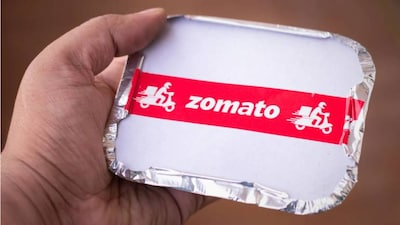

In [ ]:
image_url = "https://images.moneycontrol.com/static-mcnews/2023/09/ZOMATO-770x433.jpg?impolicy=website&width=400&height=225"
content = requests.get(image_url).content
Image(content)

In [ ]:
from langchain_core.messages import HumanMessage

vision_llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')

message = HumanMessage(content=[
    {
        'type':'text',
        'text':'what this picture shows'
    },
    {
        'type':'image_url',
        'image_url':image_url
    }
])

vision_llm.invoke([message])

AIMessage(content=' This picture shows a food delivery package from Zomato, a popular online food delivery platform in India.')

### Method 1.

In [7]:
from langchain.chains.question_answering import load_qa_chain
from langchain import PromptTemplate
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
loader = PyPDFLoader('/content/budget_speech.pdf')
data = loader.load_and_split()

In [ ]:
data[0]

Document(page_content='GOVERNMENT OF INDIA\nBUDGET 2023-2024\nSPEECH\nOF\nNIRMALA SITHARAMAN\nMINISTER OF FINANCE\nFebruary 1,  2023', metadata={'source': '/content/budget_speech.pdf', 'page': 0})

In [ ]:
context = "\n".join(str(p.page_content) for p in data)
len(context)

89204

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000,chunk_overlap=200)
context = "\n\n".join(str(p.page_content) for p in data)
texts = text_splitter.split_text(context)

In [ ]:
len(texts)

10

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embedding = GoogleGenerativeAIEmbeddings(model='models/embedding-001')
chroma_db = Chroma.from_texts(embedding=embedding,texts=texts)
vector_index = chroma_db.as_retriever()

In [ ]:
prompt_template = """
 Answer the following question based on the context and if you didn't found the answer then say 'I didn't found the answer in the document.'
 Context : {context}.
 Question : {question}.
"""

prompt = PromptTemplate(template = prompt_template,input_variables=["context","question"])

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)
chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

In [ ]:
question = "Whats the document about it"
docs = vector_index.get_relevant_documents(question)

In [ ]:
response = chain(
    {"input_documents":docs, "question": question}
    , return_only_outputs=True)

In [ ]:
response

{'output_text': "I didn't found the answer in the document."}

## Method 2

In [13]:
from PyPDF2 import PdfReader
import cassio
from langchain.vectorstores.cassandra import Cassandra
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI


In [10]:
pdfreader = PdfReader('/content/budget_speech.pdf')
raw_text = ''
for i, page in enumerate(pdfreader.pages):
    content = page.extract_text()
    if content:
        raw_text += content

len(raw_text)

89281

In [11]:
cassio.init(token=ASTRA_TOKEN,database_id=ASTRA_DB_ID)

ERROR:cassandra.connection:Closing connection <AsyncoreConnection(139015318010176) b482c89a-44be-464a-b06f-af0d79e9e59a-us-east-2.db.astra.datastax.com:29042:0e4cb963-59b7-4227-bf6d-cbe601ba4692> due to protocol error: Error from server: code=000a [Protocol error] message="Beta version of the protocol used (5/v5-beta), but USE_BETA flag is unset"


In [20]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
embedding = GoogleGenerativeAIEmbeddings(model='models/embedding-001')

In [16]:
astra_vector_store = Cassandra(
    embedding=embedding,
    table_name="qa_mini_demo",
    session=None,
    keyspace=None,
)

In [17]:
from langchain.text_splitter import CharacterTextSplitter
# We need to split the text using Character Text Split such that it sshould not increse token size
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 800,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

In [18]:
astra_vector_store.add_texts(texts[:50])

print("Inserted %i headlines." % len(texts[:50]))

astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 50 headlines.


In [21]:
first_question = True
while True:
    if first_question:
        query_text = input("\nEnter your question (or type 'quit' to exit): ").strip()
    else:
        query_text = input("\nWhat's your next question (or type 'quit' to exit): ").strip()

    if query_text.lower() == "quit":
        break

    if query_text == "":
        continue

    first_question = False

    print("\nQUESTION: \"%s\"" % query_text)
    answer = astra_vector_index.query(query_text, llm=llm).strip()
    print("ANSWER: \"%s\"\n" % answer)

    print("FIRST DOCUMENTS BY RELEVANCE:")
    for doc, score in astra_vector_store.similarity_search_with_score(query_text, k=4):
        print("    [%0.4f] \"%s ...\"" % (score, doc.page_content))


Enter your question (or type 'quit' to exit): what's the document about?

QUESTION: "what's the document about?"


ANSWER: "I am sorry, but the provided text does not contain the answer to your question."

FIRST DOCUMENTS BY RELEVANCE:


    [0.8543] "conducting interdisciplinary research, develop cutting-edge applications and 
scalab ..."
    [0.8543] "conducting interdisciplinary research, develop cutting-edge applications and 
scalab ..."
    [0.8543] "conducting interdisciplinary research, develop cutting-edge applications and 
scalab ..."
    [0.8479] "pedagogy, curriculum transaction, continuous professional development, 
dipstick sur ..."

What's your next question (or type 'quit' to exit): current GDP

QUESTION: "current GDP"


ANSWER: "I do not have enough information to answer this question."

FIRST DOCUMENTS BY RELEVANCE:


    [0.8606] "estimated to be at 7 per cent. It is notable that this is the highest among all 
the ..."
    [0.8606] "estimated to be at 7 per cent. It is notable that this is the highest among all 
the ..."
    [0.8606] "estimated to be at 7 per cent. It is notable that this is the highest among all 
the ..."
    [0.8544] "components of the scheme will include not only financial support 
but also access to ..."

What's your next question (or type 'quit' to exit): quit
